In [1]:
import game as gm
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['text.usetex'] = True

In [2]:
theta_1_arr = np.linspace(0, 1, 101)
theta_2_arr = np.linspace(0, 1, 101)
Theta_2_Mat, Theta_1_Mat = np.meshgrid(theta_1_arr, theta_2_arr)

In [3]:
my_model_1 = gm.Game2(n=5, r=0.4, M1=0, M2=1, sigma1=1, sigma2=1)
my_model_2 = gm.Game2(n=5, r=0.6, M1=0, M2=1, sigma1=1, sigma2=1)

d1s_r_l05 = np.zeros(shape=(len(theta_1_arr), len(theta_2_arr)))
d2s_r_l05 = np.zeros(shape=(len(theta_1_arr), len(theta_2_arr)))
d1s_r_g05 = np.zeros(shape=(len(theta_1_arr), len(theta_2_arr)))
d2s_r_g05 = np.zeros(shape=(len(theta_1_arr), len(theta_2_arr)))

for ii, theta_1 in enumerate(theta_1_arr):
	for jj, theta_2 in enumerate(theta_2_arr):
		d1, d2 = my_model_1.equilibrium(theta_1=theta_1, theta_2=theta_2)
		d1s_r_l05[ii, jj] = d1
		d2s_r_l05[ii, jj] = d2
		d1, d2 = my_model_2.equilibrium(theta_1=theta_1, theta_2=theta_2)
		d1s_r_g05[ii, jj] = d1
		d2s_r_g05[ii, jj] = d2

D1_r_l05 = my_model_1.r * (d1s_r_l05 + Theta_2_Mat * d2s_r_l05) + (1 - 2 * my_model_1.r) * d1s_r_l05 * d2s_r_l05 * Theta_2_Mat
D2_r_l05 = my_model_1.r * (d2s_r_l05 + Theta_1_Mat * d1s_r_l05) + (1 - 2 * my_model_1.r) * d2s_r_l05 * d1s_r_l05 * Theta_1_Mat
D1_r_g05 = my_model_1.r * (d1s_r_g05 + Theta_2_Mat * d2s_r_g05) + (1 - 2 * my_model_1.r) * d1s_r_g05 * d2s_r_g05 * Theta_2_Mat
D2_r_g05 = my_model_1.r * (d2s_r_g05 + Theta_1_Mat * d1s_r_g05) + (1 - 2 * my_model_1.r) * d2s_r_g05 * d1s_r_g05 * Theta_1_Mat

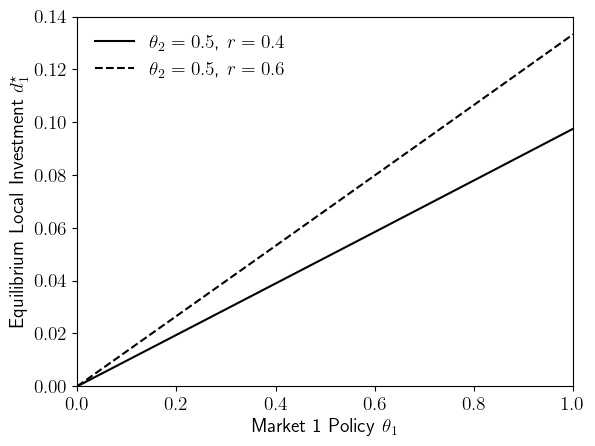

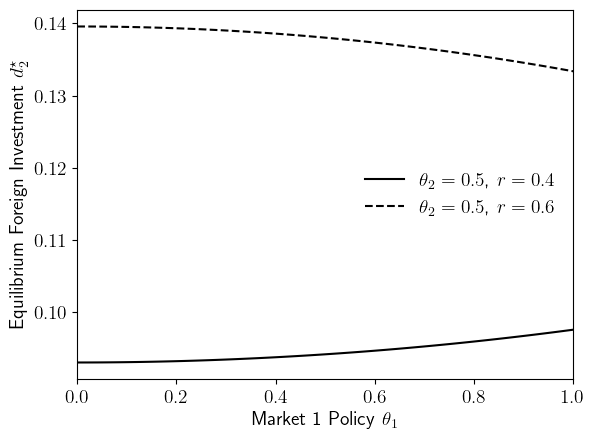

In [9]:
plt.rcParams.update({'font.size': 14})

# d_1 w.r.t. theta_1
plt.plot(theta_1_arr, d1s_r_l05[:,50], label=r'$\theta_2 = 0.5$, $r = 0.4$', color='black', linestyle='solid')
plt.plot(theta_1_arr, d1s_r_g05[:,50], label=r'$\theta_2 = 0.5$, $r = 0.6$', color='black', linestyle='dashed')
plt.xlabel(r'Market 1 Policy $\theta_1$')
plt.ylabel(r'Equilibrium Local Investment $d_1^\star$')
plt.xlim((0,1))
plt.ylim((0,0.14))
plt.legend(frameon=False)
plt.savefig('../_numerical_output/fig_d1_theta1.pdf', bbox_inches='tight')
plt.show()

# d_2 w.r.t. theta_1
plt.plot(theta_1_arr, d2s_r_l05[:,50], label=r'$\theta_2 = 0.5$, $r = 0.4$', color='black', linestyle='solid')
plt.plot(theta_1_arr, d2s_r_g05[:,50], label=r'$\theta_2 = 0.5$, $r = 0.6$', color='black', linestyle='dashed')
plt.xlabel(r'Market 1 Policy $\theta_1$')
plt.ylabel(r'Equilibrium Foreign Investment $d_2^\star$')
plt.xlim((0,1))
#plt.ylim((0,0.2))
plt.legend(frameon=False)
plt.savefig('../_numerical_output/fig_d2_theta1.pdf', bbox_inches='tight')
plt.show()

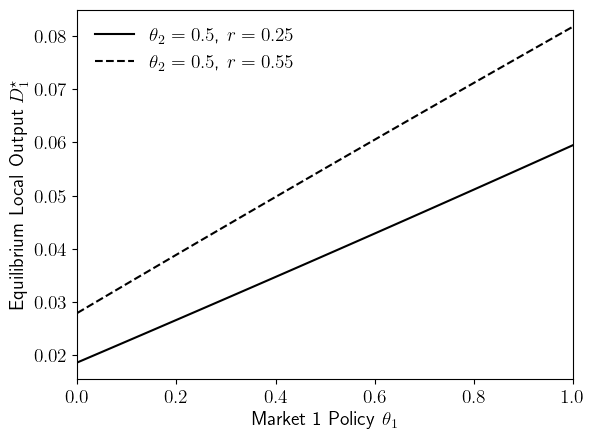

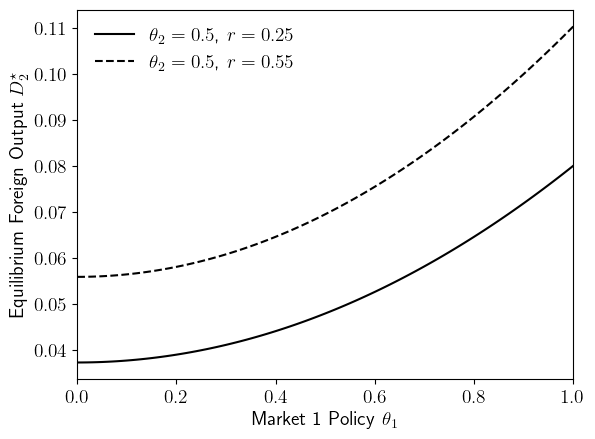

In [8]:
plt.rcParams.update({'font.size': 14})

# D_1 w.r.t. theta_1
plt.plot(theta_1_arr, D1_r_l05[:,50], label=r'$\theta_2 = 0.5$, $r = 0.25$', color='black', linestyle='solid')
plt.plot(theta_1_arr, D1_r_g05[:,50], label=r'$\theta_2 = 0.5$, $r = 0.55$', color='black', linestyle='dashed')
plt.xlabel(r'Market 1 Policy $\theta_1$')
plt.ylabel(r'Equilibrium Local Output $D_1^\star$')
plt.xlim((0,1))
#plt.ylim((0,0.14))
plt.legend(frameon=False)
plt.savefig('../_numerical_output/fig_BigD1_theta1.pdf', bbox_inches='tight')
plt.show()

# D_2 w.r.t. theta_1
plt.plot(theta_1_arr, D2_r_l05[:,50], label=r'$\theta_2 = 0.5$, $r = 0.25$', color='black', linestyle='solid')
plt.plot(theta_1_arr, D2_r_g05[:,50], label=r'$\theta_2 = 0.5$, $r = 0.55$', color='black', linestyle='dashed')
plt.xlabel(r'Market 1 Policy $\theta_1$')
plt.ylabel(r'Equilibrium Foreign Output $D_2^\star$')
plt.xlim((0,1))
#plt.ylim((0,0.14))
plt.legend(frameon=False)
plt.savefig('../_numerical_output/fig_BigD2_theta1.pdf', bbox_inches='tight')
plt.show()